In [149]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.cross_validation import train_test_split
import sklearn
%matplotlib notebook

In [4]:
with open('data/dataset.json', 'r') as f:
    data = json.load(f)

In [13]:
data[0]['username']

'kissinfashion'

In [23]:
df = pd.DataFrame(data[0]['posts']['annotations'])

TypeError: list indices must be integers or slices, not str

In [153]:
#df.head()

In [28]:
data[0]['posts'][0]['instagram']['likes']

{'count': 1351}

In [34]:
posts = [ post['instagram']['likes'] for post in user['posts'] for user in data ]

NameError: name 'user' is not defined

In [53]:
struct = ([[user['id'], post['instagram']['likes']['count']]  for user in data for post in user['posts']])

In [152]:
df = pd.DataFrame(struct)
df.columns = ['id', 'likes']
#df

<IPython.core.display.Javascript object>


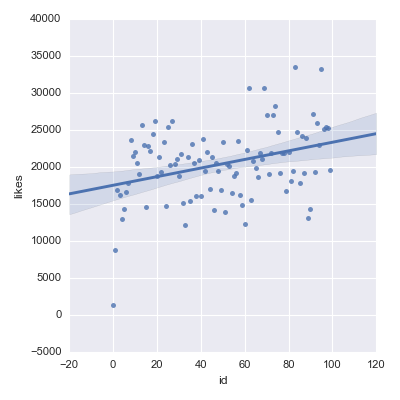

In [87]:
sns.lmplot(x='id', y='likes', data=first.iloc[0:100])

In [151]:
#first.iloc[0:100]

In [79]:
first = df[df['id'] == '528405678']
first['id'] = list(range(0, 1007))

/Users/ozeron/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [154]:
#[post['annotations'].get('labelAnnotations') for post in data[0]['posts']]

In [114]:
id_labels = [
    [post['instagram']['likes']['count'],
    (' ').join(
        [annotation['description'] for annotation in post['annotations'].get('labelAnnotations', [])]
    )] for post in data[0]['posts']]

In [124]:
idLabels = pd.DataFrame(id_labels)
idLabels.columns = ['likes', 'annotations']

In [155]:
#idLabels

In [130]:
cv = CountVectorizer()
lr = LinearRegression()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(idLabels['annotations'], idLabels['likes'], test_size=0.2, random_state=0)

In [134]:
cv.fit(X_train, y_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [135]:
lr.fit(cv.transform(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
predict = lr.predict(cv.transform(X_test))

In [138]:
lr.score(cv.transform(X_test), y_test)

-0.57780029890440798

In [150]:
sklearn.metrics.mean_squared_error(y_test, predict)

48931452.98818247

<IPython.core.display.Javascript object>


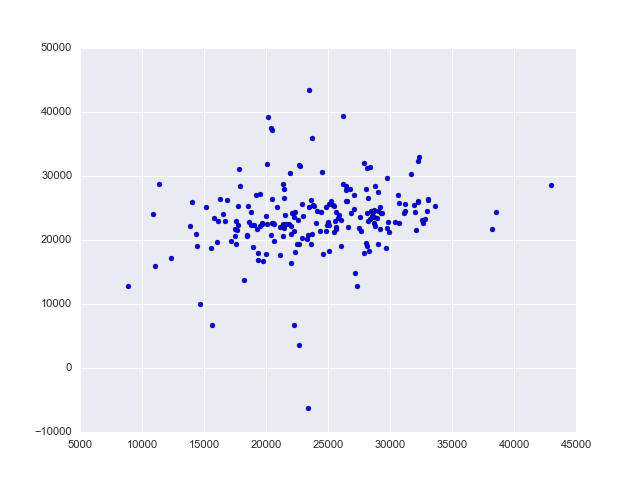

In [148]:
plt.scatter(y_test, predict)
#plt.scatter(range(len(y_test)), predict)